In [2]:
!ultralytics version

8.2.55


In [3]:
from ultralytics import YOLO
import torch
import copy


# Initialize pretrained model
#model = YOLO('yolov8n.pt')

model = YOLO("/home/areebadnankhan/code/work/Atheritia/yolov8n.pt")

# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model.state_dict())

# We should freeze all but the last layer
model.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [4]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [5]:
new_model = YOLO("/home/areebadnankhan/code/work/Atheritia/yolov8n_3logos_22freezed_withBN.pt")
new2_model = YOLO("/home/areebadnankhan/code/work/Atheritia/yolov8n_5logos_22freezed_withBN.pt")

#new_model.state_dict().items()

In [6]:
# Compare the dicts. Changes should only be in layer 21 and above
compare_dicts(old_dict, new2_model.state_dict())

Weights for parameter 'model.model.22.cv3.0.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv3.1.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv3.2.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv2.1.1.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.1.1.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.0.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.1.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv3.1.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.2.1.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.weight' are different.
Weights for parameter 'model.model.22.cv2.2.1.conv.weight' are different.
Weights for parameter 'model.model.22.cv3.2.1.bn.bias' are different.
Weights for parameter 'model.model.22

In [7]:
new_state_dict = dict()
#  Increment the head number by 1 in the state_dict
for k, v in new_model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v
  # else:
  #   new_state_dict[k] = v

In [8]:
new_state_dict['model.model.23.cv2.0.0.conv.weight'].shape


torch.Size([64, 64, 3, 3])

In [9]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp.pth")

In [10]:
new_state_dict = dict()
#  Increment the head number by 1 in the state_dict
for k, v in new2_model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.24")] = v
  # else:
  #   new_state_dict[k] = v

In [11]:
new_state_dict['model.model.24.cv2.0.0.conv.weight'].shape

torch.Size([64, 64, 3, 3])

In [12]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp2.pth")

In [13]:
from ultralytics import YOLO
import torch

import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /home/areebadnankhan/code/work/Atheritia/Notebooks


In [14]:
#model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('/home/areebadnankhan/code/work/Atheritia/yolov8n.pt')

Transferred 355/525 items from pretrained weights


In [15]:
model_2

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [16]:
state_dict = torch.load("yolov8n_lp.pth")

# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [17]:
state_dict = torch.load("yolov8n_lp2.pth")

# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [18]:
model_2

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [19]:
cd ..

/home/areebadnankhan/code/work/Atheritia


In [20]:
cd Atheritia

[Errno 2] No such file or directory: 'Atheritia'
/home/areebadnankhan/code/work/Atheritia


In [21]:
# Output of COCO model
model_coco = YOLO("/home/areebadnankhan/code/work/Atheritia/yolov8n.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("merged_images/pic5.jpg")[0]


image 1/1 /home/areebadnankhan/code/work/Atheritia/merged_images/pic5.jpg: 640x640 2 2s, 155.0ms
Speed: 4.0ms preprocess, 155.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [22]:
# Output of custom LP model
model_lp = YOLO("/home/areebadnankhan/code/work/Atheritia/yolov8n_3logos_22freezed_withBN.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("merged_images/pic5.jpg")[0]


image 1/1 /home/areebadnankhan/code/work/Atheritia/merged_images/pic5.jpg: 640x640 1 1, 137.2ms
Speed: 4.5ms preprocess, 137.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


In [23]:
# Output of custom LP model
model_lp2 = YOLO("/home/areebadnankhan/code/work/Atheritia/yolov8n_5logos_22freezed_withBN.pt")

# For plotting consistency, change all class names to class numbers
model_lp2.model.names = {k:k for k in model_lp2.names.keys()}

result_lp2 = model_lp2.predict("merged_images/pic5.jpg")[0]


image 1/1 /home/areebadnankhan/code/work/Atheritia/merged_images/pic5.jpg: 640x640 2 0s, 151.7ms
Speed: 5.1ms preprocess, 151.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
# Output of the new model
result_merged = model_2.predict("merged_images/pic5.jpg")[0]


*************-----Step1-------****************
torch.Size([1, 84, 8400])
torch.Size([1, 7, 8400])
torch.Size([1, 9, 8400])
*************-----Step2-------****************
torch.Size([1, 4, 25200])
tensor([[[ 13.0319,  19.8826,  25.6364,  ..., 542.5613, 539.0718, 586.7355],
         [ 12.5597,  12.0707,  12.3319,  ..., 572.9789, 581.6655, 589.8162],
         [ 27.3681,  39.9700,  50.0364,  ..., 198.2466, 202.8811, 113.3864],
         [ 25.9652,  24.2385,  24.7154,  ..., 134.4594, 122.4982, 116.0309]]])
*************-----Step3-------****************
torch.Size([1, 84, 25200])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
*************-----Step4-------****************
torch.Size([1, 7, 25200])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
  

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

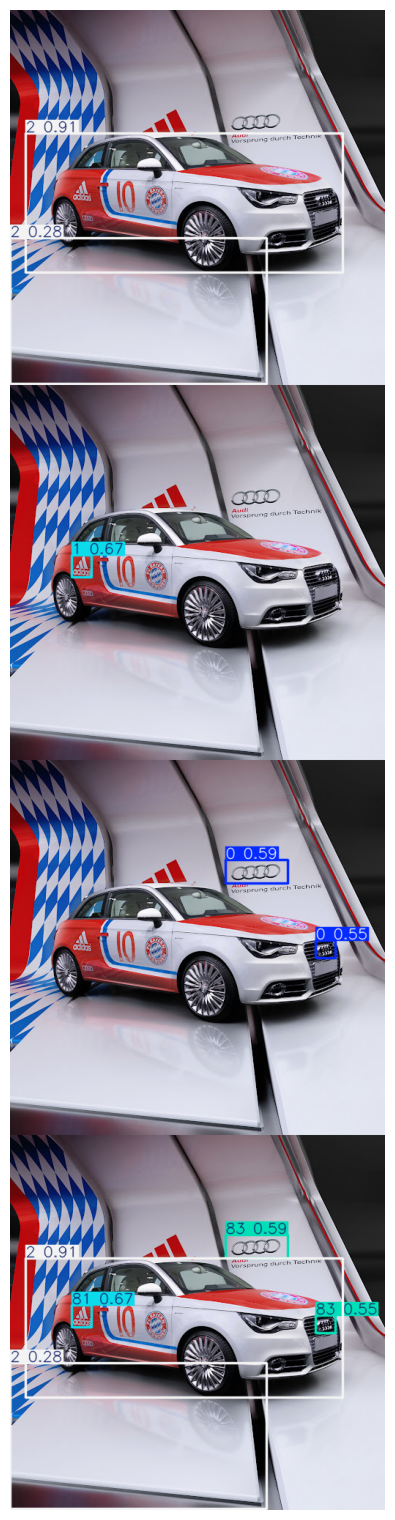

In [74]:
show_output([result_coco.plot(), result_lp.plot(), result_lp2.plot(), result_merged.plot()])